In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import matplotlib.patches as mpatches
#prepare data
data_dir = "D:/vscodepython/Statistical Calculation/Homework4_Regression/"
img_dir = "D:/vscodepython/Statistical Calculation/Homework4_Regression/image_hw4/"
D = np.loadtxt(data_dir + "la_2.txt", comments="%")
#comments:因為txt黨的第一行是以%作為註解行，所以在讀入資料時需要排除

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


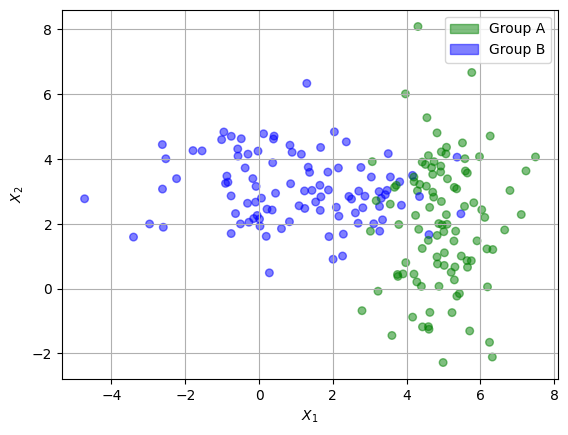

In [32]:
# 2. Scatter plot
# −−− define attributes for the scatter plot
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
colors = ["green" if i == 0 else "blue" for i in D[:,2]] #按類別畫圖
#colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]] #[R,G,B]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = "o", alpha = 0.5)
plt.grid(True)

pop_a = mpatches.Patch(color="green", alpha=0.5, label="Group A")
pop_b = mpatches.Patch(color="blue", alpha=0.5, label="Group B")
plt.legend(handles=[pop_a,pop_b])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

plt.savefig(img_dir+"scatter.eps", format="eps")
plt.show()

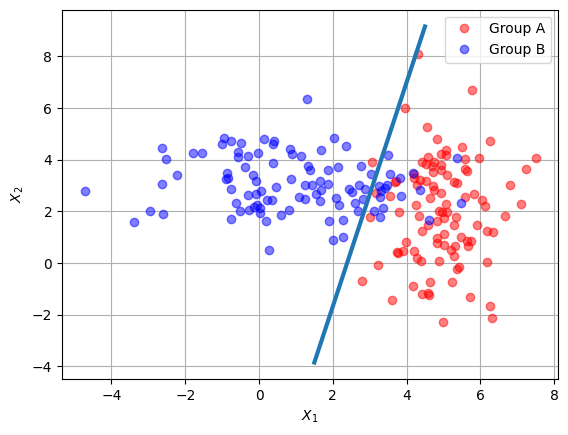

In [33]:
##從最小平方法去理解
Idx = (D[:,2]==0) #D:(200,4)
plt.plot(D[Idx, 0], D[Idx, 1], "ro", alpha = 0.5, label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"bo", alpha = 0.5, label = "Group B")

plt.legend()
plt.grid(True)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

# 3. Estimate the coefficients
n = len(D[:, 0])
X = np.c_[np.ones(n), D[:, 0:2]] #不會再橫豎不分
#X = np.hstack((np.ones((n, 1)), D[:, 0:2]))
y = D[:, 2] #橫豎不明的向量
b = LA.inv(X.T @ X) @ X.T @ y
#@:矩陣相乘 #inv:inverse

# Draw a linear regression line
x_1 = np.array([1.5, 4.5])
###書面推導
y_hat = -(b[0]-0.5 + b[1] * x_1) / b[2]
plt.plot(x_1, y_hat, lw=3)
#plt.savefig(img_dir+"scatter1.eps", format="eps")
plt.show()

##研究準確率##
#X =  D[:, 0:2]
#y = D[:, 2]
#y_hat = -(b[0]-0.5 + b[1] * X) / b[2]
#y_pre = [1 if i > 0.5 else 0 for i in y_hat] 
#print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for linear regression: 91.0000%


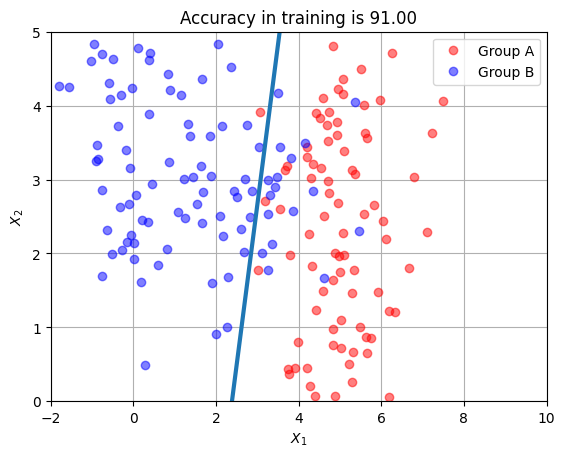

In [35]:
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
##從最小平方法去理解
Idx = (D[:,2]==0) #D:(200,4)
plt.plot(D[Idx, 0], D[Idx, 1], "ro", alpha = 0.5, label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"bo", alpha = 0.5, label = "Group B")

plt.legend()
plt.grid(True)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")


Mdl = LinearRegression()# 建立新的 linear regression model
#裡面不給參數 #研究該如何給模型 #機器學習方法介入的部分
X =  D[:, 0:2]
y = D[:, 2]

n = len(y)

##去看官網研究sklearn套件
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ... #[0 -014767 0.08354]

# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀

plt.title("Accuracy in training is {:.2f}".format( \
100 * np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.xlim(-2, 10)
plt.ylim(0, 5)
plt.savefig(img_dir+"simple regression.eps", format="eps")
plt.show()


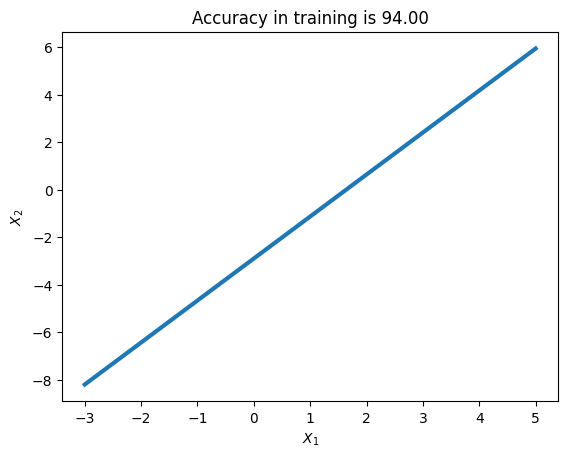

In [6]:
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
# 呼叫sklearn寫好的套件(包含beta的矩陣[1 1 ... 1])
Mdl = LinearRegression()# 建立新的 linear regression model

Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...

# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)


# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀

plt.title("Accuracy in training is {:.2f}".format( \
100 * np.mean(y_pre == y))) # 計算準確度 # 線性回歸不能用score函數，因此此處需要這樣算
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.show()


###上課練習(看圖片來畫曲線)###
比較曲線與直線切出來的分類，也可以換不同的資料以觀察結果
繪製等高線圖，用contour plot 跟 lesson8 的方法




In [14]:
# Augmented regression line by a contour line at 0.5
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]

#為了要做反矩陣，所以X矩陣要放入一行1
b = LA.pinv(X) @ y # pseudo inverse
#若是改成使用LinearRegressionmodel 來求，就不需要加入那行1

##去看官網研究sklearn套件
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ... #[0 -014767 0.08354]

f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)

#xx = np.linspace(x_min, x_max, nx)
#yy = np.linspace(y_min, y_max, ny)
#X, Y = np.meshgrid(xx, yy)


xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

###plot contour plot
contours = plt.contour(
X, Y, Z, levels = [0.5], colors="g", linestyles="--")
plt.title("Linear and Augmented Regression lines")
plt.show()


ValueError: operands could not be broadcast together with shapes (6,) (100,100) 

ValueError: operands could not be broadcast together with shapes (6,) (2,) 

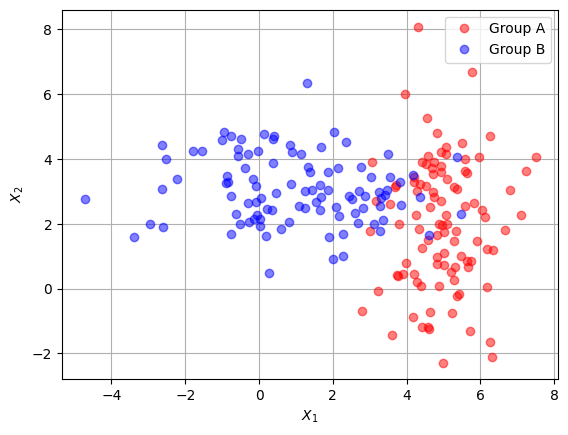

In [31]:
from sklearn.linear_model import LinearRegression
# Linear Regression by sklearn
##從最小平方法去理解
Idx = (D[:,2]==0) #D:(200,4)
plt.plot(D[Idx, 0], D[Idx, 1], "ro", alpha = 0.5, label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"bo", alpha = 0.5, label = "Group B")

plt.legend()
plt.grid(True)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")


Mdl = LinearRegression()# 建立新的 linear regression model
#裡面不給參數 #研究該如何給模型 #機器學習方法介入的部分
X =  D[:, 0:2]
y = D[:, 2]

n = len(y)
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2:3]
##去看官網研究sklearn套件
Mdl.fit(X, y) # 進行估計 （ 配適 ）
# R2 = Mdl.score(X, y) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ... #[0 -014767 0.08354]

f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)


# Draw a regression line
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
plt.plot(x, f, lw=3)
# Calculate testing error
y_hat = Mdl.predict(X) # 預 測 或 計 算 擬 合 值

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀

plt.title("Accuracy in training is {:.2f}".format( \
100 * np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.xlim(-2, 10)
plt.ylim(0, 5)
plt.show()


Accuracy in training for linear regression: 97.6500%


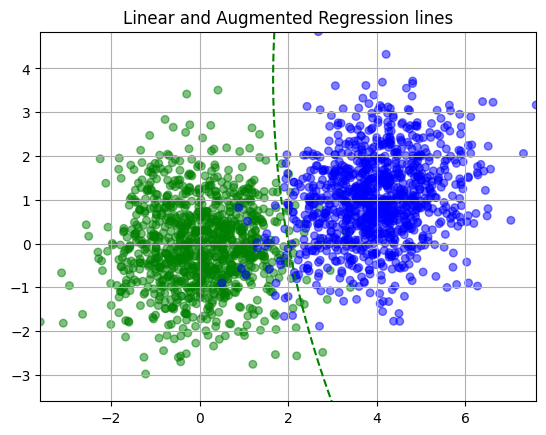

In [74]:
####繪製散布圖
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
colors = ["green" if i == 0 else "blue" for i in D[:,2]]
#colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]] #[R,G,B]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = "o", alpha = 0.5)
plt.grid(True)

x1 = D[:,0:1]
x2 = D[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2]
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))


####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)

xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])


contours = plt.contour(
X, Y, Z, levels = [0.5], colors="g", linestyles="--")
plt.title("Linear and Augmented Regression lines")

#print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

#plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
#plt.xlim(-2, 8)
#plt.ylim(0, 5)
plt.show()

In [67]:
####繪製散布圖
s = 30 # define the size of markers
# define the colors of markers according to group value 0, 1
# colors = D[:,2]
colors = ["green" if i == 0 else "blue" for i in D[:,2]]
#colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]] #[R,G,B]
plt.scatter(D[:, 0], D[:, 1], c = colors, s = s, marker = "o", alpha = 0.5)
plt.grid(True)

x1 = D[:,0:1]
x2 = D[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2]
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#plt.clabel(contours, inline=1, fontsize=10)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

plt.title("Linear and Augmented Regression lines")



#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  D[:, 0:2]
y = D[:, 2]
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.plot(x, f, lw=3, label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))


print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.xlim(-4, 8)
plt.ylim(-5, 10)
plt.legend(loc="upper left")
plt.savefig(img_dir+"simple and augmented.eps", format="eps")
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\217573075.py:66: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = plt.contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for augmented regression: 97.5500%
Accuracy in training for linear regression: 97.6000%


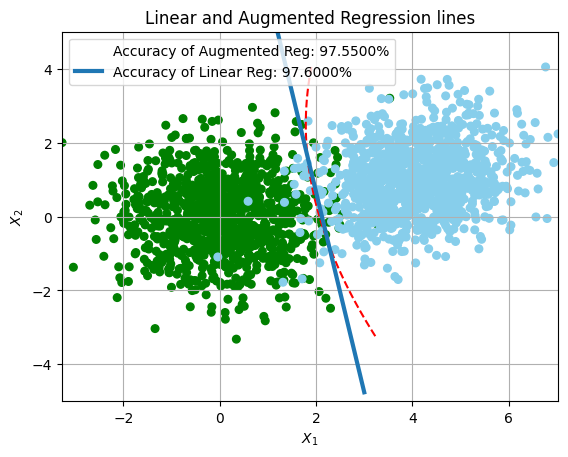

In [92]:
######n=1000時，沒切成訓練及與資料集######

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
n1, n2 = 1000, 1000
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

##繪製散布圖
colors = ["green" if i == 0 else "skyblue" for i in y]
plt.scatter(D[:, 0], D[:, 1], c=colors, s=30, marker="o")
plt.grid(True)


#####Augmented Regression
x1 = D[:,0:1]
x2 = D[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:, 2]
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = plt.contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

plt.title("Linear and Augmented Regression lines")

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  D[:, 0:2]
y = D[:, 2]
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
plt.plot(x, f, lw=3, label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))


print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
plt.xlabel("$X_1$"), plt.ylabel("$X_2$")
plt.legend(loc="upper left")
plt.ylim(-5, 5)
plt.savefig(img_dir+"simulation n=1000.eps", format="eps")
plt.show()




In [1]:
######n=1000時，沒切成訓練及與資料集######

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, n={}".format(n))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(-5, 5)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([0, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, n={}".format(n))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(-5, 5)


plt.savefig(img_dir+"simulation, n=1000.eps", format="eps")
plt.show()

NameError: name 'LinearRegression' is not defined

######n=1000時，沒切成訓練及與資料集######

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, n={}".format(n))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(-5, 5)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([0, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, n={}".format(n))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(-5, 5)


plt.savefig(img_dir+"simulation, n=1000.eps", format="eps")
plt.show()

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3389030931.py:90: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3389030931.py:144: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for augmented regression: 97.8125%
0.978125
[0.81268922 0.75995063 0.794122   0.78096406 0.76016433]
0.78 accuracy with a standard deviation of 0.02
Accuracy in training for linear regression: 98.1250%
Accuracy in testing for augmented regression: 96.2500%
Accuracy in test for linear regression: 96.2500%


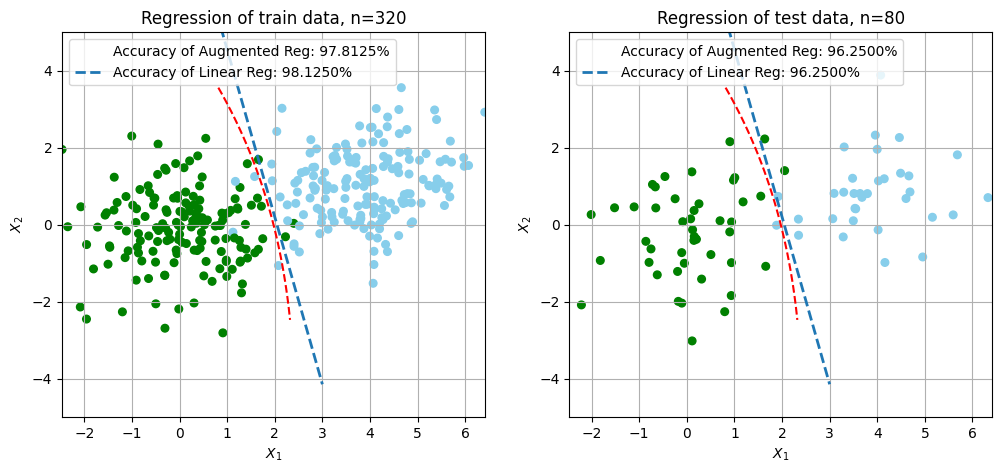

In [150]:
######n=1000時，沒切成訓練及與資料集######

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([4, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, n={}".format(n))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-3, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(-5, 5)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([0, 5])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, n={}".format(n))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([0, 3])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(-5, 5)


plt.savefig(img_dir+"simulation, n=200.eps", format="eps")
plt.show()

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3412196898.py:91: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3412196898.py:145: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for augmented regression: 94.3750%
0.94375
[0.74079097 0.74309657 0.73504414 0.72945365 0.73672582]
0.74 accuracy with a standard deviation of 0.00
Accuracy in training for linear regression: 94.9375%
Accuracy in testing for augmented regression: 95.5000%
Accuracy in test for linear regression: 96.0000%


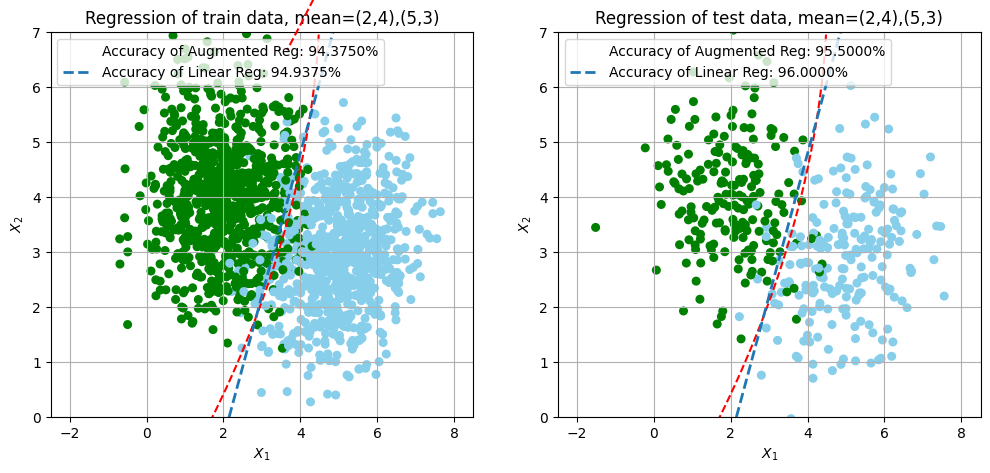

In [208]:
######n=1000時，沒切成訓練及與資料集######

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
a, b, c, d = 2, 4, 5, 3
m1, m2 = np.array([a, b]), np.array([c, d])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, mean=({},{}),({},{})".format(a, b, c, d))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(0, 7)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, mean=({},{}),({},{})".format(a, b, c, d))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(0, 7)


plt.savefig(img_dir+"simulation, mean1.eps", format="eps")
plt.show()

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\4023940207.py:89: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\4023940207.py:143: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for augmented regression: 86.3125%
0.863125
[0.57119297 0.51460438 0.55676065 0.54338957 0.55205784]
0.55 accuracy with a standard deviation of 0.02
Accuracy in training for linear regression: 86.3125%
Accuracy in testing for augmented regression: 85.7500%
Accuracy in test for linear regression: 84.7500%


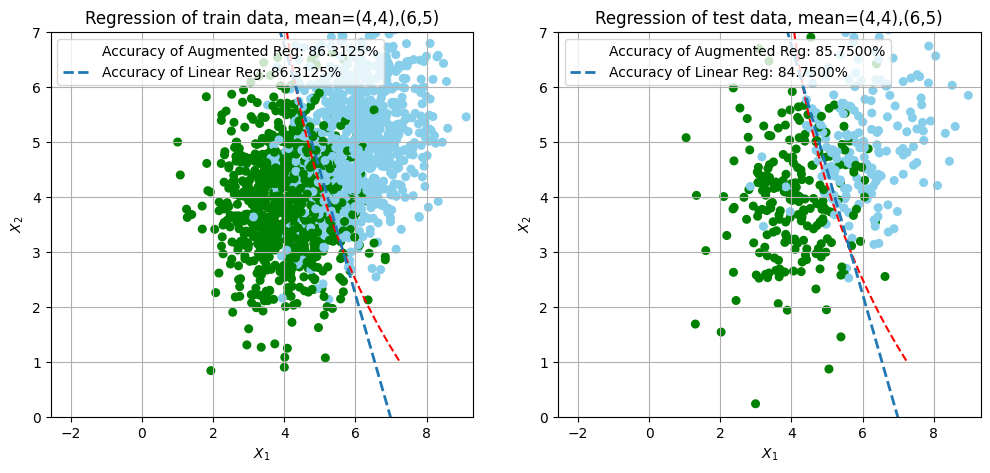

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
a, b, c, d = 4, 4, 6, 5
m1, m2 = np.array([a, b]), np.array([c, d])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, mean=({},{}),({},{})".format(a, b, c, d))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(0, 7)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, mean=({},{}),({},{})".format(a, b, c, d))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(0, 7)


plt.savefig(img_dir+"simulation, mean2.eps", format="eps")
plt.show()

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\2902894386.py:89: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\2902894386.py:143: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Accuracy in training for augmented regression: 96.5000%
0.965
[0.78566317 0.77787417 0.79054793 0.77828542 0.74282687]
0.78 accuracy with a standard deviation of 0.02
Accuracy in training for linear regression: 96.6875%
Accuracy in testing for augmented regression: 98.5000%
Accuracy in test for linear regression: 98.5000%


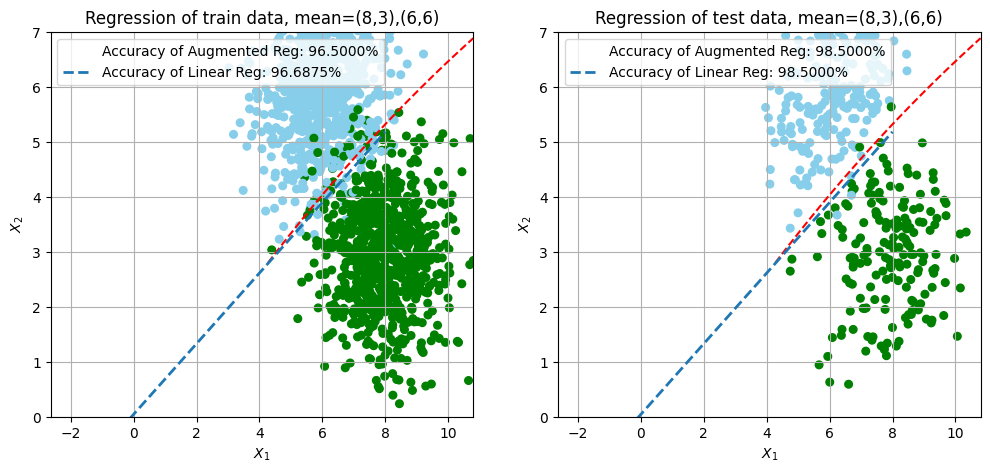

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
a, b, c, d = 8, 3, 6, 6
m1, m2 = np.array([a, b]), np.array([c, d])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, mean=({},{}),({},{})".format(a, b, c, d))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(0, 7)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, mean=({},{}),({},{})".format(a, b, c, d))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(0, 7)


plt.savefig(img_dir+"simulation, mean3.eps", format="eps")
plt.show()

Accuracy in training for augmented regression: 83.6875%
0.836875
[0.51196516 0.49578038 0.44628523 0.44731144 0.49172271]
0.48 accuracy with a standard deviation of 0.03
Accuracy in training for linear regression: 83.8125%
Accuracy in testing for augmented regression: 83.0000%
Accuracy in test for linear regression: 83.2500%


C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3550032044.py:89: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\3550032044.py:143: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


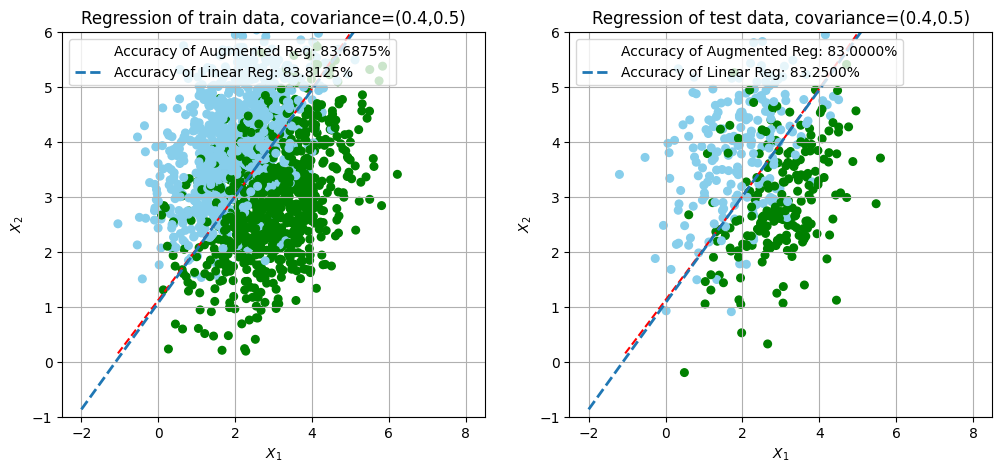

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
m1, m2 = np.array([3, 3]), np.array([2, 4])
a, b = 0.4, 0.5
Cov1 = np.array([[1, a], [a, 1]])
Cov2 = np.array([[1, b], [b, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, covariance=({},{})".format(a, b))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-2, 8])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(-1, 6)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([-2, 3])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, covariance=({},{})".format(a, b))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(-1, 6)


plt.savefig(img_dir+"simulation, cov1.eps", format="eps")
plt.show()

Accuracy in training for augmented regression: 96.3750%
0.96375
[0.75379568 0.82249393 0.76779808 0.73502225 0.75831351]
0.77 accuracy with a standard deviation of 0.03
Accuracy in training for linear regression: 96.1875%
Accuracy in testing for augmented regression: 93.7500%
Accuracy in test for linear regression: 94.0000%


C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\2080573517.py:89: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[0].contour(
C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_11036\2080573517.py:143: UserWarning: The following kwargs were not used by contour: 'lw'
  contours = axes[1].contour(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


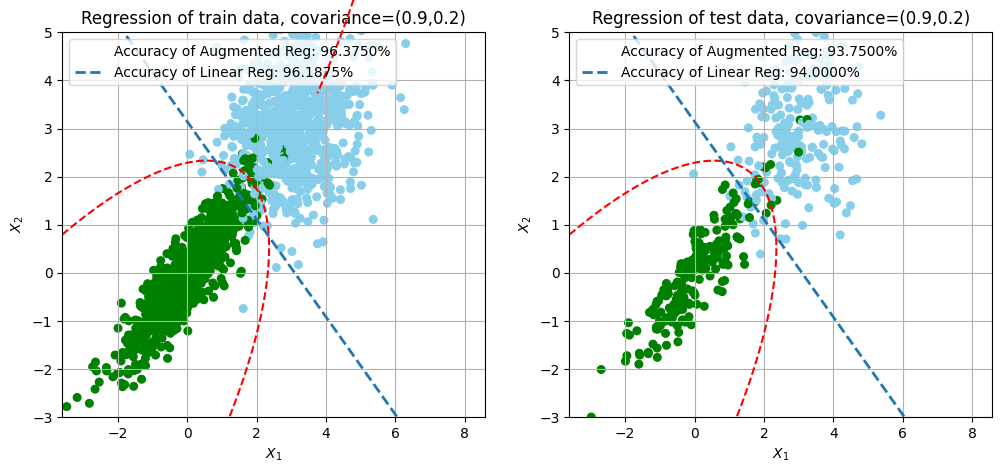

In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 1000, 1000
m1, m2 = np.array([0, 0]), np.array([3, 3])
a, b = 0.9, 0.2
Cov1 = np.array([[1, a], [a, 1]])
Cov2 = np.array([[1, b], [b, 1]])

##兩組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
##多變量常態隨機變數
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
##資料矩陣
D = np.vstack((A, B))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料

data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data.txt", comments="%")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = D[:,0:2]
label = D[:, 2]

#train:1600 test:400
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

#####Augmented Regression
###train_data
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)

####建立迴歸模型
Mdl = LinearRegression()
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
y_hat = Mdl.predict(X) 

#判斷分類在0還是1
#在  y_hat的值中，>0的話y_pre為1，<0的話y_pre為0
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
print("Accuracy in training for augmented regression: {:.4f}%".format(100 *np.mean(y_pre == y)))

from sklearn.metrics import accuracy_score #works
print(accuracy_score(train_label, y_pre))

scores = cross_val_score(Mdl, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

fig, axes = plt.subplots(1, 2, figsize = [12, 5])

###########plot##########
###plot train data
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[0].scatter(train_data[:, 0],train_data[:, 1], c=colors, s=30, marker="o")
axes[0].set_title("Regression of train data, covariance=({},{})".format(a, b))
axes[0].set_xlabel("$X_1$")
axes[0].set_ylabel("$X_2$")
axes[0].grid(True)

####plot contour plot####
x = np.array([-2, 2])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[0].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[0].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in training for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[0].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[0].legend(loc="upper left")
axes[0].set_ylim(-3, 5)


##test_data
#####Augmented Regression
###迴歸模型###
x1 = train_data[:,0:1]
x2 = train_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = train_label
n = len(y)
Mdl = LinearRegression()
Mdl.fit(X, y)
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 

####plot contour plot####
x = np.array([-2, 3])
f = (
lambda x: intrcp
+ coeffs[0] * x[0]
+ coeffs[1] * x[1]
+ coeffs[2] * x[0] * x[1]
+ coeffs[3] * x[0] ** 2
+ coeffs[4] * x[1] ** 2)
xx = np.linspace(x1.min(), x1.max(), 100)
yy = np.linspace(x1.min(), x2.max(), 100)
#每一個點的x是一個x矩陣, 每一個y的點是一個矩陣
X, Y = np.meshgrid(xx, yy) #網格:100*100的網格
Z = f([X, Y])

contours = axes[1].contour(
X, Y, Z, levels = [0.5], colors="red", linestyles="--", lw=3)

#測試資料預測#
###test_data
x1 = test_data[:,0:1]
x2 = test_data[:,1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = test_label
n = len(y)
y_hat_test = Mdl.predict(X) 
y_pre_test = [1 if i > 0.5 else 0 for i in y_hat_test] # 群組判讀
print("Accuracy in testing for augmented regression: {:.4f}%".format(100 *np.mean(y_pre_test == y)))

labels = ["Accuracy of Augmented Reg: {:.4f}%".format(100 *np.mean(y_pre_test == y))]
for i in range(len(labels)):
    contours.collections[i].set_label(labels[i])


###########plot##########
###畫測試資料集##
colors = ["green" if i == 0 else "skyblue" for i in y]
axes[1].scatter(test_data[:, 0], test_data[:, 1], c=colors, s=30, marker="o")
axes[1].set_title("Regression of test data, covariance=({},{})".format(a, b))
axes[1].set_xlabel("$X_1$")
axes[1].set_ylabel("$X_2$")
axes[1].grid(True)

#########簡單線性迴歸###########
Mdl = LinearRegression()
X =  train_data[:, 0:2]
y = train_label
n = len(y)
Mdl.fit(X, y) 
intrcp = Mdl.intercept_ 
coeffs = Mdl.coef_ 
x = np.array([-2, 8])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]  

X = test_data[:,0:2]
y = test_label
y_hat = Mdl.predict(X) 
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
axes[1].plot(x, f, lw=2, linestyle="--", label="Accuracy of Linear Reg: {:.4f}%".format(100 *np.mean(y_pre == y)))
print("Accuracy in test for linear regression: {:.4f}%".format(100 *np.mean(y_pre == y)))
axes[1].set_xlabel("$X_1$"), plt.ylabel("$X_2$")
axes[1].legend(loc="upper left")
axes[1].set_ylim(-3, 5)


plt.savefig(img_dir+"simulation, cov2.eps", format="eps")
plt.show()

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
n1, n2, n3 = 500, 500, 500
a, b, c, d, e, f = 1, 5, 3, 2, 4, 4
m1, m2, m3 = np.array([a, b]), np.array([c, d]), np.array([e, f])

cov1, cov2, cov3 = 0.9, 0.2, 0.5
Cov1 = np.array([[1, cov1], [cov1, 1]])
Cov2 = np.array([[1, cov2], [cov2, 1]])
Cov3 = np.array([[1, cov3], [cov3, 1]])
##三組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
##多變量常態隨機變數
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
##資料矩陣
D = np.vstack((A, B, C))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))
np.savetxt("demo_data1.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料
data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data1.txt", comments="%")


X = D[:,0:2]
Y = D[:, 2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X, Y)
y_hat = logreg.predict(X) 

score = logreg.score(X, Y)
print(score)

#預測機率
y_pro = logreg.predict_proba(X) ##获取预测概率值
print(y_pro)
#預測類別
y_predict = logreg.predict(X)
print(y_predict)

print("Accuracy in logistic regression: {:.4f}%".format(100 *np.mean(y_predict == Y)))

_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("Accuracy of Logistic Regression is {:.4f}%".format(100 *np.mean(y_predict == Y)))
plt.xticks(())
plt.yticks(())
#plt.savefig(img_dir+"log1.eps", format="eps")
plt.show()



ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (c:\Users\adfghkfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\inspection\__init__.py)

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
n1, n2, n3 = 1000, 1000, 1000
a, b, c, d, e, f = 5, 5, 7, 1, 3, 6
m1, m2, m3 = np.array([a, b]), np.array([c, d]), np.array([e, f])

cov1, cov2, cov3 = 0.4, 0.2, 0.5
Cov1 = np.array([[1, cov1], [cov1, 1]])
Cov2 = np.array([[1, cov2], [cov2, 1]])
Cov3 = np.array([[1, cov3], [cov3, 1]])
##三組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
##多變量常態隨機變數py -m pip install -U scikit-learn
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
##資料矩陣
D = np.vstack((A, B, C))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))
np.savetxt("demo_data1.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料
data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data1.txt", comments="%")


X = D[:,0:2]
Y = D[:, 2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X, Y)
y_hat = logreg.predict(X) 

score = logreg.score(X, Y)
print(score)

#預測機率
y_pro = logreg.predict_proba(X) ##获取预测概率值
print(y_pro)
#預測類別
y_predict = logreg.predict(X)
print(y_predict)

print("Accuracy in logistic regression: {:.4f}%".format(100 *np.mean(y_predict == Y)))

_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="contourf",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("Accuracy of Logistic Regression is {:.4f}%".format(100 *np.mean(y_predict == Y)))
plt.xticks(())
plt.yticks(())
#plt.savefig(img_dir+"log2.eps", format="eps")
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (c:\Users\adfghkfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\inspection\__init__.py)

0.9283333333333333
[[9.19153252e-01 7.18787587e-02 8.96798922e-03]
 [4.92096265e-02 9.50790373e-01 7.25794808e-10]
 [9.16516311e-01 8.34760503e-02 7.63870757e-06]
 ...
 [1.97853205e-04 7.20145021e-05 9.99730132e-01]
 [2.30180772e-04 2.94843680e-06 9.99766871e-01]
 [3.40535574e-04 1.90498244e-07 9.99659274e-01]]
[0. 1. 0. ... 2. 2. 2.]
Accuracy in logistic regression: 92.8333%


c:\Users\adfghkfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


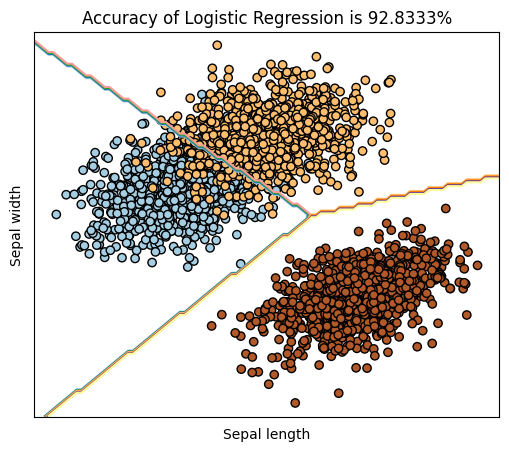

In [269]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
n1, n2, n3 = 1000, 1000, 1000
a, b, c, d, e, f = 5, 5, 7, 7, 9, 1
m1, m2, m3 = np.array([a, b]), np.array([c, d]), np.array([e, f])

cov1, cov2, cov3 = 0.4, 0.2, 0.5
Cov1 = np.array([[1, cov1], [cov1, 1]])
Cov2 = np.array([[1, cov2], [cov2, 1]])
Cov3 = np.array([[1, cov3], [cov3, 1]])
##三組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
##多變量常態隨機變數
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
##資料矩陣
D = np.vstack((A, B, C))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))
np.savetxt("demo_data1.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料
data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data1.txt", comments="%")


X = D[:,0:2]
Y = D[:, 2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X, Y)
y_hat = logreg.predict(X) 

score = logreg.score(X, Y)
print(score)

#預測機率
y_pro = logreg.predict_proba(X) ##获取预测概率值
print(y_pro)
#預測類別
y_predict = logreg.predict(X)
print(y_predict)

print("Accuracy in logistic regression: {:.4f}%".format(100 *np.mean(y_predict == Y)))

_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="contour",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("Accuracy of Logistic Regression is {:.4f}%".format(100 *np.mean(y_predict == Y)))
plt.xticks(())
plt.yticks(())
plt.savefig(img_dir+"log3.eps", format="eps")
plt.show()


0.87
[[7.71972876e-01 8.49788898e-05 2.27942145e-01]
 [9.37594030e-01 6.75818397e-03 5.56477858e-02]
 [8.15520563e-01 2.10496682e-06 1.84477332e-01]
 ...
 [1.14628364e-01 1.38254929e-05 8.85357810e-01]
 [1.60861426e-01 1.32430466e-01 7.06708107e-01]
 [3.08324884e-02 2.11691710e-09 9.69167510e-01]]
[0. 0. 0. ... 2. 2. 2.]
Accuracy in logistic regression: 87.0000%


c:\Users\adfghkfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:152: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


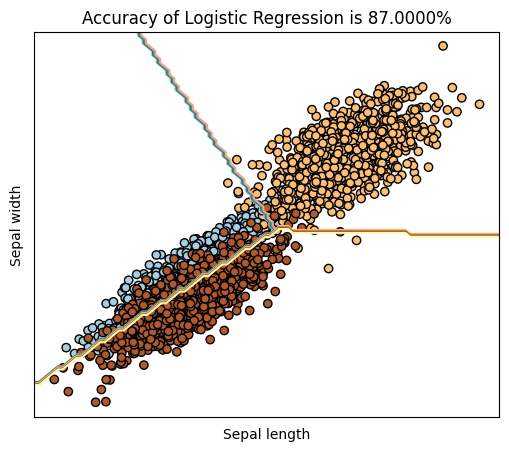

In [263]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
n1, n2, n3 = 1000, 1000, 1000
a, b, c, d, e, f = 5, 5, 9, 9, 5, 4
m1, m2, m3 = np.array([a, b]), np.array([c, d]), np.array([e, f])

cov1, cov2, cov3 = 0.9, 0.6, 0.8
Cov1 = np.array([[1, cov1], [cov1, 1]])
Cov2 = np.array([[1, cov2], [cov2, 1]])
Cov3 = np.array([[1, cov3], [cov3, 1]])
##三組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
##多變量常態隨機變數
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
##資料矩陣
D = np.vstack((A, B, C))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))
np.savetxt("demo_data1.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料
data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data1.txt", comments="%")


X = D[:,0:2]
Y = D[:, 2]

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X, Y)
y_hat = logreg.predict(X) 

score = logreg.score(X, Y)
print(score)

#預測機率
y_pro = logreg.predict_proba(X) ##获取预测概率值
print(y_pro)
#預測類別
y_predict = logreg.predict(X)
print(y_predict)

print("Accuracy in logistic regression: {:.4f}%".format(100 *np.mean(y_predict == Y)))

_, ax = plt.subplots(figsize=(6, 5))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="contour",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.title("Accuracy of Logistic Regression is {:.4f}%".format(100 *np.mean(y_predict == Y)))
plt.xticks(())
plt.yticks(())
plt.savefig(img_dir+"log4.eps", format="eps")
plt.show()

[[-3.08301177  3.38975126]
 [ 1.35961956 -2.70772093]
 [ 1.72339221 -0.68203033]]
[-8.26799577  7.76419448  0.5038013 ]
0.8973333333333333
[[9.99594619e-01 1.50569772e-05 3.90323736e-04]
 [9.94017957e-01 6.85227106e-05 5.91352074e-03]
 [9.99767265e-01 8.78187799e-06 2.23953591e-04]
 ...
 [5.88587519e-08 1.88580636e-01 8.11419305e-01]
 [7.46912213e-07 8.08205649e-01 1.91793604e-01]
 [4.60867131e-04 1.63705862e-01 8.35833271e-01]]
[0. 0. 0. ... 2. 1. 2.]


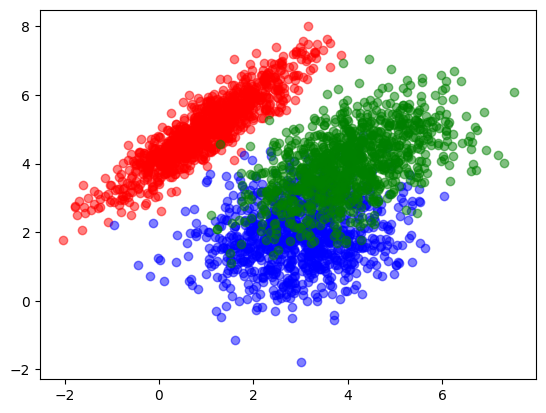

In [239]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from scipy.stats import multivariate_normal
n1, n2, n3 = 1000, 1000, 1000
a, b, c, d, e, f = 1, 5, 3, 2, 4, 4
m1, m2, m3 = np.array([a, b]), np.array([c, d]), np.array([e, f])

cov1, cov2, cov3 = 0.9, 0.2, 0.5
Cov1 = np.array([[1, cov1], [cov1, 1]])
Cov2 = np.array([[1, cov2], [cov2, 1]])
Cov3 = np.array([[1, cov3], [cov3, 1]])
##三組多變量常態資料
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
##多變量常態隨機變數
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
##資料矩陣
D = np.vstack((A, B, C))
##群組值0 or 1
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)+1))
np.savetxt("demo_data1.txt", np.c_[D, y], fmt = "%.4f %.4f %d")
#存下資料
data_dir = "D:/vscodepython/Statistical Calculation/"
D = np.loadtxt(data_dir + "demo_data1.txt", comments="%")


Idx = (D[:,2]==0) #D:(200,4)
plt.plot(D[Idx, 0], D[Idx, 1], "ro", alpha = 0.5, label = "Group A")
Idx = (D[:,2]==1)
plt.plot(D[Idx,0], D[Idx,1],"bo", alpha = 0.5, label = "Group B")
Idx = (D[:,2]==2)
plt.plot(D[Idx,0], D[Idx,1],"go", alpha = 0.5, label = "Group C")

X = D[:,0:2]
Y = D[:, 2]
train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs',class_weight='balanced',max_iter=1000)
logreg.fit(X, Y)
print(logreg.coef_)
print(logreg.intercept_)

score = logreg.score(X, Y)
print(score)


#預測機率
y_pro = logreg.predict_proba(X) ##获取预测概率值
print(y_pro)

#預測類別
y_predict = logreg.predict(X)
print(y_predict)
